
# Описание проекта

Клиентам компании «Мегалайн» предлагают два тарифных плана: «Смарт» и «Ультра».  
Цель: понять, какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.  
Предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 


<details>
<summary> Описание тарифов </summary>

_Тариф «Смарт»_

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей 
    

_Тариф «Ультра»_

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  

Важно: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
    
    
</details>

<details>
<summary> Описание данных </summary>
    
**Таблица users (информация о пользователях):**

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках):**

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
</details>

**Шаги**

1. Изучение общей информации
2. Подготовка данных  
• привести данные к нужным типам;  
• исправить ошибки в данных.  
• посчитать для каждого пользователя:  
_количество сделанных звонков и израсходованных минут разговора по месяцам;  
количество отправленных сообщений по месяцам;  
объем израсходованного интернет-трафика по месяцам;  
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)._
3. Анализ данных  
Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?  
Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.
4. Проверка гипотезы  
• средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;  
• средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  
5. Общий вывод


### Шаг 1. Изучение общей информации

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [7]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [8]:
#показывать все колонки
pd.set_option('display.max_columns', 30)

In [9]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица заполнена. Выборка содержит данные о 500 клиентах. Пропуски в churn_date  говорят, что 38 пользователей пекратили пользоваться указанным тарифом. Все остальные - пользовались указанным тарифом на момент выгрузки до конца 2018 года.

churn_date и reg_date нужно заменить тип данных 

In [11]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Все данные заполнены. Информация о 202 607 звонках.  В столбце call_date необходимо изменить тип данных

In [13]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Все столбцы заполнены непустыми значениями. session_date - изменить тип данных.
Столбец Unnamed: 0 удалим, он дублирует индексы. 

In [15]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Необходимо сменить тип данных в message_date

In [17]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Вывод: Предоставлены данные о 500 пользователях. Пропуски в churn_date говорят, что 38 пользователей пекратили пользоваться указанным тарифом. Все остальные - пользовались указанным тарифом на момент выгрузки до конца 2018 года. Во всех таблицах, где содержтся дата, необходимо сменить тип данных для дальнейшей работы. 

### Шаг 2. Подготовка данных

In [18]:
#удалим столбец Unnamed: 0 из таблицы internet
internet.drop('Unnamed: 0', axis = True)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [19]:
# изменим тип данных в столбцах с датами
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [20]:
#проверим ,что диапазон дат соответствует 2018 году
min_date = calls['call_date'].min()

In [21]:
max_date = calls['call_date'].max()

In [22]:
(min_date, max_date)

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [23]:
#узнаем самую раннюю дату регистрации в указанной выборке
users['reg_date'].min()

Timestamp('2018-01-01 00:00:00')

In [24]:
#создадим столбец с номером месяца
calls['month'] = calls['call_date'].dt.month

In [25]:
#округлим минуты разговора вверх до целого
calls['min_round'] = np.ceil(calls['duration'])

In [26]:
calls

,id,call_date,duration,user_id,month,min_round
0,1000_0,2018-07-25,0.00,1000,7,0.0
1,1000_1,2018-08-17,0.00,1000,8,0.0
2,1000_2,2018-06-11,2.85,1000,6,3.0
3,1000_3,2018-09-21,13.80,1000,9,14.0
4,1000_4,2018-12-15,5.18,1000,12,6.0
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,1.0
202603,1499_216,2018-10-18,18.83,1499,10,19.0
202604,1499_217,2018-11-10,10.81,1499,11,11.0
202605,1499_218,2018-10-06,4.27,1499,10,5.0


In [27]:
#сгруппируем по пользователям и месяцу, посчитаем количество звонков, совершенных каждым пользователем за месяц, 
# и потраченное количество минут в месяц 
calls_month = calls.groupby(['user_id', 'month'])['min_round'].agg(['count','sum']).reset_index()

In [28]:
#переименуем столбцы
calls_month.columns = ['user_id', 'month', 'call_count', 'call_sum']

In [29]:
#делаем аналогичные расчеты с количеством сообщений
messages['month'] = messages['message_date'].dt.month

In [30]:
messages_month = messages.groupby(['user_id', 'month']).agg(['count']).reset_index()

In [31]:
messages_month.columns = ['user_id', 'month', 'count_message', 'count']

In [32]:
messages_month = messages_month.drop('count', axis = True)

In [33]:
#делаем аналогично с данными по Интернету
internet['month'] = internet['session_date'].dt.month

In [34]:
internet['mb_used'] = np.ceil(internet['mb_used'])

In [35]:
internet_month = internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum']).reset_index()

In [36]:
internet_month.columns = ['user_id', 'month', 'mb']

In [37]:
#создадим датафрейм с месяцами
month = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [38]:
#создадим датафрейм с уникальными пользователями
user_id = pd.DataFrame(users['user_id'])

In [39]:
#объединим month  и user_id так, чтобы в каждом юзере были все 12 месяцев, для этого создадим одинаковый параметр key
month['key'] = 1

In [40]:
users['key'] = 1

In [41]:
total = users.merge(month,on='key')

In [42]:
total

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,0
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,3
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,4
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,5
...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1,8
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1,9
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1,10
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1,11


Получили 12 * 500 строк, по каждому пользователю есть 12 строк с номером месяца

In [43]:
total.columns = ['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff_name', 'key', 'month']

In [44]:
#удалим теперь уже ненужный столбец key
total = total.drop('key', axis = True)

In [45]:
#уберем из таблицы ненужные месяцы: раньше даты регистрации и позже даты окончания обслуживания
total = total[(total['month'] >= total['reg_date'].dt.month) & ((total['churn_date'].isna() == True) | (total['month'] <= total['churn_date'].dt.month))]

In [46]:
#объединим оставшиеся таблицы с total
total = total.merge(calls_month, how='left',on=['user_id','month'])

In [47]:
total = total.merge(messages_month, how='left',on=['user_id','month'])

In [48]:
total = total.merge(internet_month, how='left',on=['user_id','month'])

In [49]:
total = total.merge(tariffs, how='left',on=['tariff_name'])

In [50]:
total

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,call_count,call_sum,count_message,mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22.0,159.0,22.0,2256.0,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43.0,172.0,60.0,23257.0,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47.0,340.0,75.0,14016.0,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52.0,408.0,81.0,14070.0,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58.0,466.0,57.0,14581.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,41.0,247.0,42.0,20604.0,50,15360,500,550,200,3,3
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9.0,70.0,11.0,1848.0,50,15360,500,550,200,3,3
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,68.0,449.0,48.0,17809.0,50,15360,500,550,200,3,3
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,74.0,612.0,59.0,17984.0,50,15360,500,550,200,3,3


In [51]:
#проверим, сколько пользователей на тарифе Ультра превысили лимит по звонкам
total.query('((tariff_name == "ultra") and (call_sum > minutes_included))')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,call_count,call_sum,count_message,mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [52]:
#аналогично для тарифа смарт, запишем в отдельну колонку количество превышенных минут
total['delta_call'] = total.query('((tariff_name == "smart") and (minutes_included > 500))')['call_sum'] - total['minutes_included']

In [53]:
# заменим пустые значения Nan на нули
total['delta_call'] = total['delta_call'].fillna(0)

In [54]:
#аналогично с числом смс
total.query('((tariff_name == "ultra") and (messages_included > 1000))')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,call_count,call_sum,count_message,mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,delta_call


In [55]:
total['delta_message'] = total.query('((tariff_name == "smart") and (messages_included > 50))')['count_message'] - total['messages_included']

In [56]:
total['delta_message'] = total['delta_message'].fillna(0)

In [57]:
total['delta_internet'] = total.query('((tariff_name == "smart") and (mb  > mb_per_month_included)) or ((tariff_name == "ultra") and (mb > mb_per_month_included))')['mb']

In [58]:
total.loc[((total['delta_internet'] > 0) & (total['tariff_name'] == 'smart')), 'delta_internet'] =  total['delta_internet'] - total['mb_per_month_included']

In [59]:
total.loc[((total['delta_internet'] > 0) & (total['tariff_name'] == 'ultra')), 'delta_internet'] =  total['delta_internet'] - total['mb_per_month_included']

In [60]:
total['delta_internet'] = total['delta_internet'].fillna(0)

In [61]:
total['delta_internet'] = total['delta_internet'] / 1024

In [62]:
total['delta_internet'] = np.ceil(total['delta_internet'])

In [63]:
total

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,call_count,call_sum,count_message,mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,delta_call,delta_message,delta_internet
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22.0,159.0,22.0,2256.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43.0,172.0,60.0,23257.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47.0,340.0,75.0,14016.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52.0,408.0,81.0,14070.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58.0,466.0,57.0,14581.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,41.0,247.0,42.0,20604.0,50,15360,500,550,200,3,3,0.0,0.0,6.0
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9.0,70.0,11.0,1848.0,50,15360,500,550,200,3,3,0.0,0.0,0.0
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,68.0,449.0,48.0,17809.0,50,15360,500,550,200,3,3,0.0,0.0,3.0
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,74.0,612.0,59.0,17984.0,50,15360,500,550,200,3,3,0.0,0.0,3.0


In [64]:
def total_revenue(row):
    if row[7] == 'ultra':
        revenue = row[16] + row[20] * row[19] + row[21] * row[18] + row[22] * row[17]
    else:
        revenue = row[16] + row[20] * row[19] + row[21] * row[18] + row[22] * row[17]
    
    return revenue

In [65]:
total['revenue'] = total.apply(total_revenue, axis=1)

In [66]:
total

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,call_count,call_sum,count_message,mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,delta_call,delta_message,delta_internet,revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22.0,159.0,22.0,2256.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43.0,172.0,60.0,23257.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47.0,340.0,75.0,14016.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52.0,408.0,81.0,14070.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58.0,466.0,57.0,14581.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,41.0,247.0,42.0,20604.0,50,15360,500,550,200,3,3,0.0,0.0,6.0,1750.0
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9.0,70.0,11.0,1848.0,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,68.0,449.0,48.0,17809.0,50,15360,500,550,200,3,3,0.0,0.0,3.0,1150.0
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,74.0,612.0,59.0,17984.0,50,15360,500,550,200,3,3,0.0,0.0,3.0,1150.0


In [67]:
#выручка за год от абонентов из предоставленной выборки
total['revenue'].sum()

4611250.0

Вывод: Сделана общая таблица, которая содержит данные по каждому пользователю помесячно , с месяца регистрации до даты прекращения пользования тарифом. В педоставленной выборке дата регистрации у всех пользоваталей в диапазоне с января по декабрь, содержится 38 пользователей, которые прекратили пользоваться тарифом в течение года. Добавлены столбцы с превышением минут, сообщений , интернета. Расчитана прибыль по каждому пользователю помесячно. Общая прибыль по выборке по всем пользователям по всем месяцам составила 4 611 250 руб.

Длительность многих звонков — 0.0 минут. Вероятно, это звонки, где пользователь не дозвонился, либо звонок был сброшен. По условиям тарифа значения округляются вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Но в условиях ничего не сказано про 0 минут. Проанализировала тарифы таких крупных операторов как Мегафон, Билайн и МТС. У всех звонки 0 секунд не тарифицируются. Поэтому в дальнейших расчетах, все значения свыше 0 округляются до целых минут, 0 так и остается. С точки зрения клиента это справедливо. 

### Шаг 3. Анализ данных

In [68]:
#посмотрим среднее и медиану по каждому тарифу
total.pivot_table(index = 'tariff_name', values =['call_sum', 'count_message', 'mb', 'revenue'], aggfunc = ['mean', 'median'] )

mean                                            median  \
               call_sum count_message            mb      revenue call_sum   
tariff_name                                                                 
smart        419.062978     38.716441  16236.472621  1152.152466    423.0   
ultra        545.451104     61.161006  19686.767179  2070.943205    528.0   

                                            
            count_message       mb revenue  
tariff_name                                 
smart                34.0  16532.0   950.0  
ultra                51.0  19411.0  1950.0

In [69]:
total.pivot_table(index = 'tariff_name', values =['user_id'], aggfunc = ['count'] )

,count
,user_id
tariff_name,
smart,2230
ultra,986


Пользователи тарифа smart в среднем укладываются в отведенное количество минут и сообщений, но количества Гб им не хватает. 
Пользователи тарифа ультра тратят в среднем значительно меньше, чем отведенное им количество.

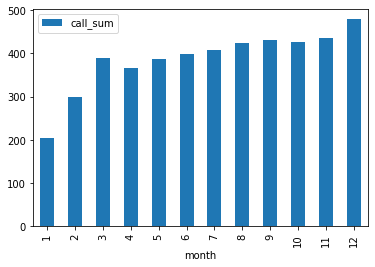

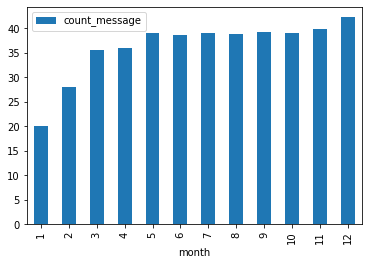

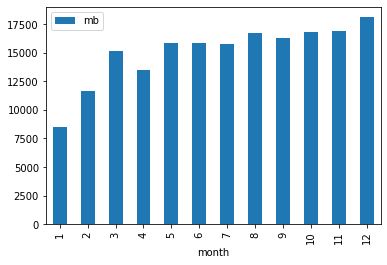

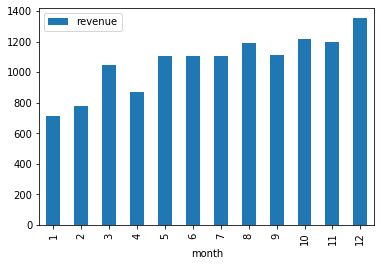

In [70]:
total.query('tariff_name == "smart"').pivot_table(index='month', values='call_sum').plot(kind='bar')
total.query('tariff_name == "smart"').pivot_table(index='month', values='count_message').plot(kind='bar')
total.query('tariff_name == "smart"').pivot_table(index='month', values='mb').plot(kind='bar')
total.query('tariff_name == "smart"').pivot_table(index='month', values='revenue').plot(kind='bar')

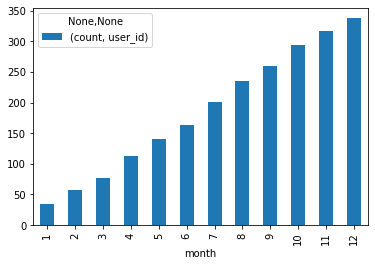

In [71]:
#посмотрим количество пользователей в каждом месяце
total.query('tariff_name == "smart"').pivot_table(index = 'month', values =['user_id'], aggfunc = ['count'] ).plot(kind='bar')

Видно, что среднее потребление услуг, как и прибыль на тарифе, растет в течение года.

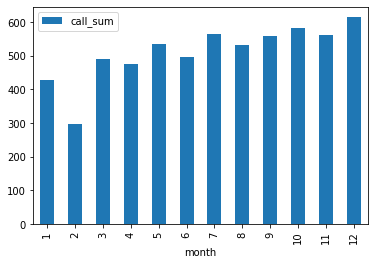

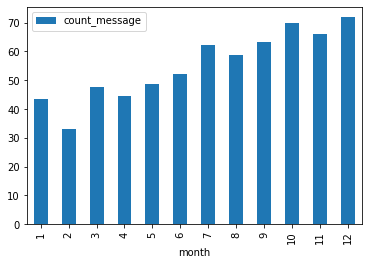

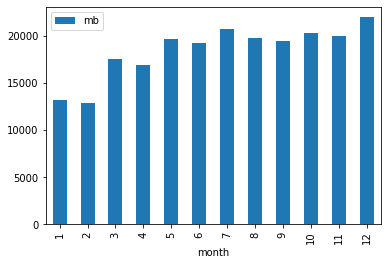

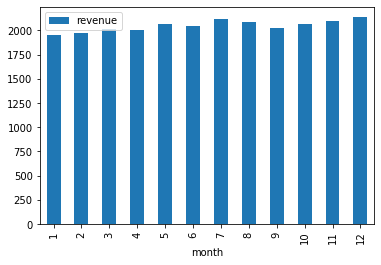

In [72]:
total.query('tariff_name == "ultra"').pivot_table(index='month', values='call_sum').plot(kind='bar')
total.query('tariff_name == "ultra"').pivot_table(index='month', values='count_message').plot(kind='bar')
total.query('tariff_name == "ultra"').pivot_table(index='month', values='mb').plot(kind='bar')
total.query('tariff_name == "ultra"').pivot_table(index='month', values='revenue').plot(kind='bar')

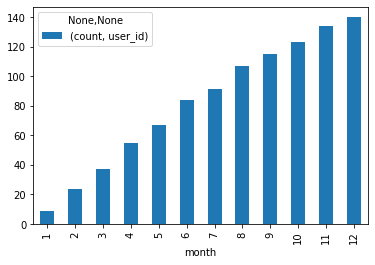

In [73]:
#посмотрим количество пользователей в каждом месяце
total.query('tariff_name == "ultra"').pivot_table(index = 'month', values =['user_id'], aggfunc = ['count'] ).plot(kind='bar')

На тарифе Ультра количество пользователе в выборке также больше с каждым месяцем. Но прибыль примерно на одном уровне.

Text(0.5, 1.0, 'Прибыль')

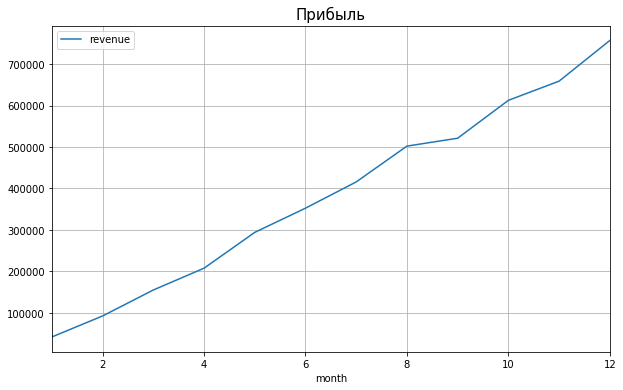

In [74]:
total.pivot_table(index='month', values='revenue', aggfunc='sum').plot(figsize=(10,6), grid=True)
plt.title('Прибыль', fontsize=15)

In [75]:
total.pivot_table(index='tariff_name', values='revenue', aggfunc='sum')

,revenue
tariff_name,
smart,2569300.0
ultra,2041950.0


In [76]:
#создадим датафрейм с интересующими нас столбцами
total_ultra = total.query('tariff_name == "ultra"')
total_smart = total.query('tariff_name == "smart"')

In [77]:
total_ultra_2 = total_ultra.loc[:, ['call_sum', 'count_message', 'mb', 'revenue']]

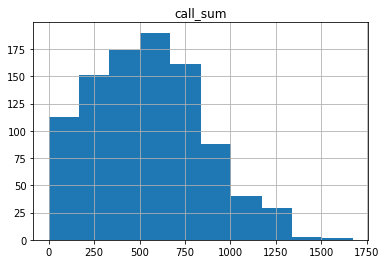

среднее 545.4511041009464
дисперсия 94203.4183961481
стандартное отклонение 306.9257538821858
интервал -375.32615754561107 1466.2283657475039


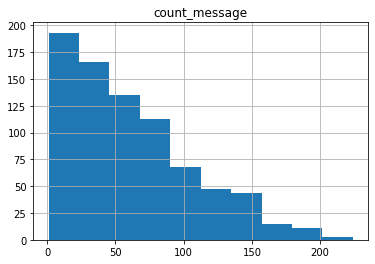

среднее 61.161006289308176
дисперсия 2109.6591828651995
стандартное отклонение 45.93102636416042
интервал -76.63207280317309 198.95408538178944


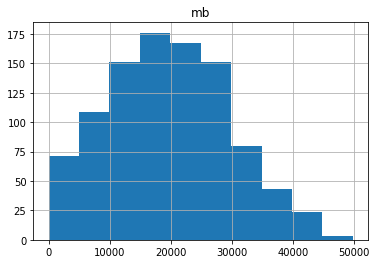

среднее 19686.76717948718
дисперсия 99043439.60795662
стандартное отклонение 9952.057054094726
интервал -10169.403982797001 49542.938341771354


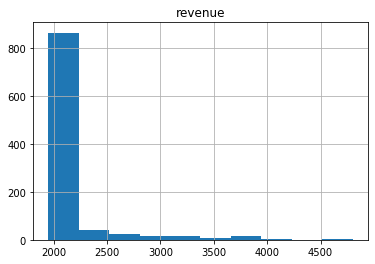

среднее 2070.943204868154
дисперсия 143360.42925834784
стандартное отклонение 378.6296729765746
интервал 935.0541859384302 3206.832223797878


In [78]:
for column in total_ultra_2:
    #total_ultra_2.describe()
    total_ultra_2.hist(column)
    plt.show()
    variance = np.var(total_ultra_2[column], ddof=1)
    standart_deviation = np.sqrt(variance)
    mean = total_ultra_2[column].mean()
    min_a = mean - 3*standart_deviation
    max_a = mean + 3*standart_deviation
    print('среднее', mean)
    print('дисперсия', variance)
    print('стандартное отклонение', standart_deviation)
    print('интервал', min_a, max_a)

<font color=green>Классная автоматизация, еще и с масштабированием.

In [79]:
total_smart_2 = total_smart.loc[:, ['call_sum', 'count_message', 'mb', 'revenue']]

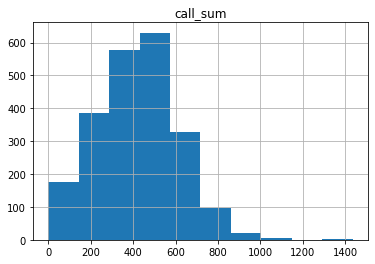

среднее 419.0629779577148
дисперсия 35844.1895513438
стандартное отклонение 189.3256177894154
интервал -148.91387541053132 987.0398313259609


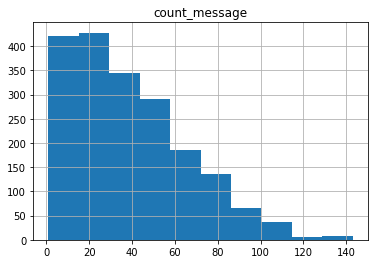

среднее 38.71644120707596
дисперсия 717.5942011753547
стандартное отклонение 26.787948804926344
интервал -41.64740520770307 119.08028762185499


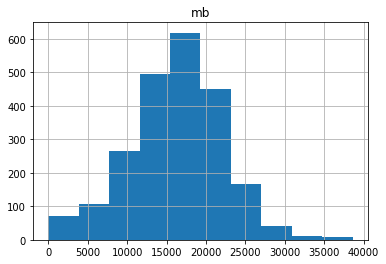

среднее 16236.47262118492
дисперсия 34443100.68133359
стандартное отклонение 5868.824471845583
интервал -1370.0007943518285 33842.94603672167


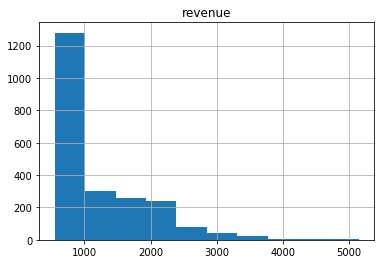

среднее 1152.152466367713
дисперсия 546679.9767435779
стандартное отклонение 739.3781013416464
интервал -1065.981837657226 3370.286770392652


In [80]:
for column in total_smart_2:
    total_smart_2.hist(column)
    plt.show()
    variance = np.var(total_smart_2[column], ddof=1)
    standart_deviation = np.sqrt(variance)
    mean = total_smart_2[column].mean()
    min_a = mean - 3*standart_deviation
    max_a = mean + 3*standart_deviation
    print('среднее', mean)
    print('дисперсия', variance)
    print('стандартное отклонение', standart_deviation)
    print('интервал', min_a, max_a)

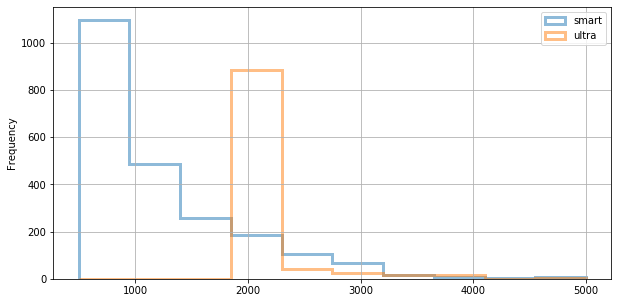

In [81]:
ax = total.query('tariff_name == "smart"').plot(kind='hist', y = 'revenue', histtype='step', range=(500, 5000), figsize=(10, 5), linewidth=3, alpha=0.5, label='smart')
total.query('tariff_name == "ultra"').plot(kind='hist', y = 'revenue', histtype='step', range=(500, 5000), figsize=(10, 5), linewidth=3, alpha=0.5, label='ultra', ax=ax, grid=True, legend=True)

Вывод: 

Смарт

Пользователи тарифа smart в среднем укладываются в отведенное количество минут и сообщений, но количества Гб им не хватает. Поэтому приходится платить за использованные сверх тарифа гигабайты. Сам тариф стоит 550 руб, в среднем пользователи платят около тысячи.

Больше всего использованных минут, смс и интернета в декабре, меньше всего в январе. Это логично ,потому что количество клиентов, пользующихся тарифом ежемесячно увеличивается и максимально в декабре. При  этом мы видим, что количество минут, смс и мб увеличивается не так резко, как количество пользователей. Аналогично с прибылью. Например, прибыль за май, июнь и июль одинакова, но при этом количество пользователей в июле больше, чем в июне и мае. Иными словами, есть клиенты, которые приносят высокую прибыль. 

Ультра

Пользователи тарифа ультра тратят в среднем значительно меньше, чем отведенное им количество. Укладываются в отведенные Гб. Поэтому в среднем не переплачивают выше тарифа. На тарифе Ультра количество пользователе в выборке также больше с каждым месяцем. Но прибыль примерно на одном уровне. Значит, есть пользователи, которые значительно превышали отведенный лимит. Особенно это заметно в январе.

Суммарная выручка с каждым месяцем растет.

Распределение по количеству израсходованных минут и Гб - нормальное. Распределение по количеству смс - распределение Пуассона. Большинство пользователей не отправляют сообщения. Прибыль также распределение Пуассона, большинство пользователей платят абонентскую плату без превышения.


### Шаг 4. Проверка гипотезы

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова  
Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [82]:
sample_1 = total.query('tariff_name == "ultra"')['revenue']
sample_2 = total.query('tariff_name == "smart"')['revenue']

In [83]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем нулевую гипотезу

In [84]:
results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Нулевая гипотеза: средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов  
Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [85]:
sample_moscow = total.query('city == "Москва"')['revenue']
sample_city = total.query('city != "Москва"')['revenue']

In [86]:
results_2 = st.ttest_ind(
    sample_moscow, 
    sample_city)

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22025747449507033
Не получилось отвергнуть нулевую гипотезу


Вывод: 
Сформулировали 2 нулевых гипотезы. Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Получили:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова
- средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов

На основе этого сформулировали альтернативные гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Чтобы определить, когда отвергать нулевую гипотезу, а когда нет, использовали уровень значимости. Пороговое значение взяли 5%.

Вероятность получить наблюдаемый результат в первом случае равна 0. То есть нулевую гипотезу отвергли. Делавем вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» отличается. 

Вероятность того, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, составила 22%.
Отвергнуть нулевую гипотезу не можем.


### Шаг 5. Общий вывод

Проанализировали данные помесячно по 500 пользователям за 2018 год.
Посчитали превышение минут, сообщений , интернета. Расчитали прибыль по каждому пользователю помесячно. Общая прибыль по выборке по всем пользователям по всем месяцам составила 4 611 250 руб.

Пользователи тарифа Smart в среднем укладываются в отведенное количество минут и сообщений, но количества Гб им не хватает. Поэтому приходится платить за использованные сверх тарифа гигабайты. Сам тариф стоит 550 руб, в среднем пользователи платят около тысячи.

Пользователи тарифа Ultra тратят в среднем значительно меньше, чем отведенное им количество. Укладываются в отведенные Гб. Поэтому в среднем не переплачивают выше тарифа. Есть клиенты, которые переплачивают довольно много, поэтому, возможно, им стоит предложить перейти на более дорогой тариф.

Средняя выручка пользователей тарифов «Smart» и «Ultra» отличается. 
По цифрам мы видим, что суммарная прибыль за год на тарифе "Ультра" ниже, чем на тарифе "Smart". Это связано с тем, что в предоставленной выборке количество клиентов, пользующихся тарифом Smart примерно  в 2.5 раза выше, чем пользующихся тарифом Ultra. Можно сделать вывод, что тариф «Smart» пользуется большей популярностью у населения. 

В Москве прибыль не отличается от других регионов. 

Т.к. больше всего из предоставленных пакетов пользователи используют интернет, возможно, стоит подумать о промежуточном тарифе, который бы включал большее количество Гб. 